<a href="https://colab.research.google.com/github/jasmitha31/AI-KMEANS-CLUSTERING/blob/main/AI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode

In [2]:
df = pd.read_csv('/content/transaction_final.csv')
print(df.head())
print(df)


   CustomerID ProductID  Quantity      Price   TransactionDate PaymentMethod  \
0      109318         C         7  80.079844  12/26/2023 12:32          Cash   
1      993229         C         4  75.195229     8/5/2023 0:00          Cash   
2      579675         A         8  31.528816   3/11/2024 18:51          Cash   
3      799826         D         5  98.880218  10/27/2023 22:00        PayPal   
4      121413         A         7  93.188512  12/22/2023 11:38          Cash   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354           Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483      Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...           Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142     Electronics   

   DiscountApplied(%)  TotalAmount  
0           18.677100   455.862764  
1           

In [3]:
a = df['Price'].values
b = df['TotalAmount'].values
c = df['Quantity'].values
d = df['ProductCategory'].values
e = df['PaymentMethod'].values
f = df['StoreLocation'].values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          499 non-null    int64  
 1   ProductID           499 non-null    object 
 2   Quantity            499 non-null    int64  
 3   Price               499 non-null    float64
 4   TransactionDate     499 non-null    object 
 5   PaymentMethod       499 non-null    object 
 6   StoreLocation       499 non-null    object 
 7   ProductCategory     499 non-null    object 
 8   DiscountApplied(%)  499 non-null    float64
 9   TotalAmount         499 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 39.1+ KB


In [5]:
mean_da = df['Quantity'].mean()
print("Mean of  Quantity:",mean_da)
mean_db = df['Price'].mean()
print("Mean of  Price:",mean_db)

median_da=df['Quantity'].median()
print("Meadian of  Quantity:", median_da)
median_db=df['Price'].median()
print("Meadian of  Price:", median_db)

mode_da=df['Quantity'].mode()
print("Mode of  Quantity:", mode_da)
mode_db=df['Price'].mode()
print("Mode of  Price:", mode_db)

Mean of  Quantity: 4.903807615230461
Mean of  Price: 54.688443475591185
Meadian of  Quantity: 5.0
Meadian of  Price: 54.73566233
Mode of  Quantity: 0    1
Name: Quantity, dtype: int64
Mode of  Price: 0      10.011594
1      10.180298
2      11.096414
3      11.503531
4      11.696626
         ...    
494    98.880218
495    98.953855
496    99.203241
497    99.858925
498    99.999284
Name: Price, Length: 499, dtype: float64


In [6]:
df.drop_duplicates()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
...,...,...,...,...,...,...,...,...,...,...
494,953640,B,1,71.915313,7/22/2023 19:10,Debit Card,"30912 Daniel Estates\nGuzmanchester, MH 40218",Home Decor,19.444885,57.931464
495,246637,A,7,25.669699,12/12/2023 5:25,PayPal,"29389 Tommy Lights Suite 702\nSouth Crystal, C...",Electronics,6.614202,167.802975
496,587590,D,9,88.377706,8/25/2023 23:40,PayPal,"8711 Jonathon Vista Apt. 368\nLoriburgh, WI 89346",Books,3.986390,763.691639
497,367759,C,4,87.280642,9/8/2023 12:11,Cash,"0468 Harper Hills\nHarrischester, AZ 24084",Clothing,1.997566,342.148614


In [7]:
x=df['Quantity']
range=np.ptp(x)
print("the range of  Quantity", range)
y=df['Price']
range1=np.ptp(y)
print("the range of  Price", range1)

variance=np.var(x)
print("The variance of  Quantity",variance)
variance1=np.var(y)
print("The variance of  Price",variance1)

interquartile_x=np.percentile(x, 75) - np.percentile(x, 25)
print("Standard Deviation of x:",interquartile_x )
interquartile_y=np.percentile(x, 75) - np.percentile(y, 25)
print("Standard Deviation of y:",interquartile_x )

the range of  Quantity 8
the range of  Price 89.98768958
The variance of  Quantity 6.820406343749625
The variance of  Price 639.9206089643606
Standard Deviation of x: 4.0
Standard Deviation of y: 4.0


In [8]:
from scipy.stats import skew, kurtosis
y=df['CustomerID']
x=df['Quantity']
z=df['Price']
skewness_x = skew(x)
skewness_y = skew(y)
skewness_z = skew(z)
kurtosis_z = kurtosis(z)
kurtosis_y = kurtosis(y)
kurtosis_x = kurtosis(x)
print("Skewness of y:", skewness_y)
print("Skewness of x:", skewness_x)
print("Skewness of z:", skewness_z)
print("Kurtosis of z:", kurtosis_z)
print("Kurtosis of x:", kurtosis_x)
print("Kurtosis of y:", kurtosis_y)

Skewness of y: 0.1363908450796138
Skewness of x: 0.027517548286131066
Skewness of z: 0.010328357436976852
Kurtosis of z: -1.1700827679165116
Kurtosis of x: -1.2407238032948895
Kurtosis of y: -1.2498184917545878


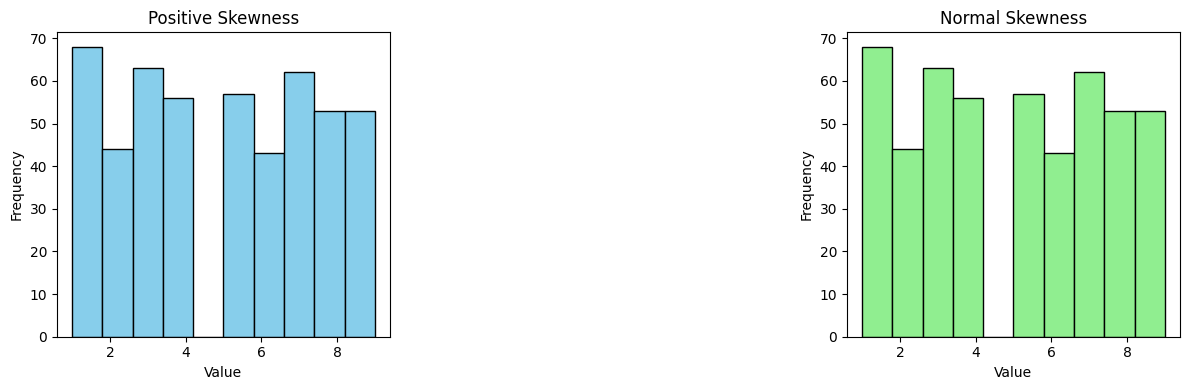


Skewness Values:
Positive Skewness: 0.027517548286131066
Negative Skewness: -0.027517548286131066
Normal Skewness: 0.027517548286131014


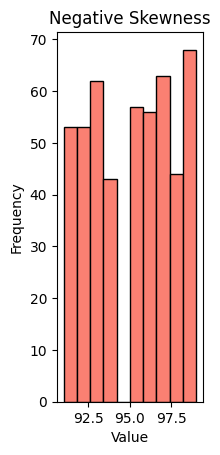

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
data=df['Quantity']
skewness = skew(data)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title("Positive Skewness")
plt.xlabel("Value")
plt.ylabel("Frequency")


plt.subplot(1, 3, 3)
plt.hist(np.random.permutation(data), bins=10, color='lightgreen', edgecolor='black')
plt.title("Normal Skewness")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.subplot(1, 3, 2)
plt.hist(100 - data, bins=10, color='salmon', edgecolor='black')
plt.title("Negative Skewness")
plt.xlabel("Value")
plt.ylabel("Frequency")
print("\nSkewness Values:")
print("Positive Skewness:", skewness)
print("Negative Skewness:", -skewness)
print("Normal Skewness:", skew(np.random.permutation(data)))


Skewness Values:
Positive Skewness: 0.010328357436976852
Negative Skewness: -0.010328357436976852
Normal Skewness: 0.010328357436976838


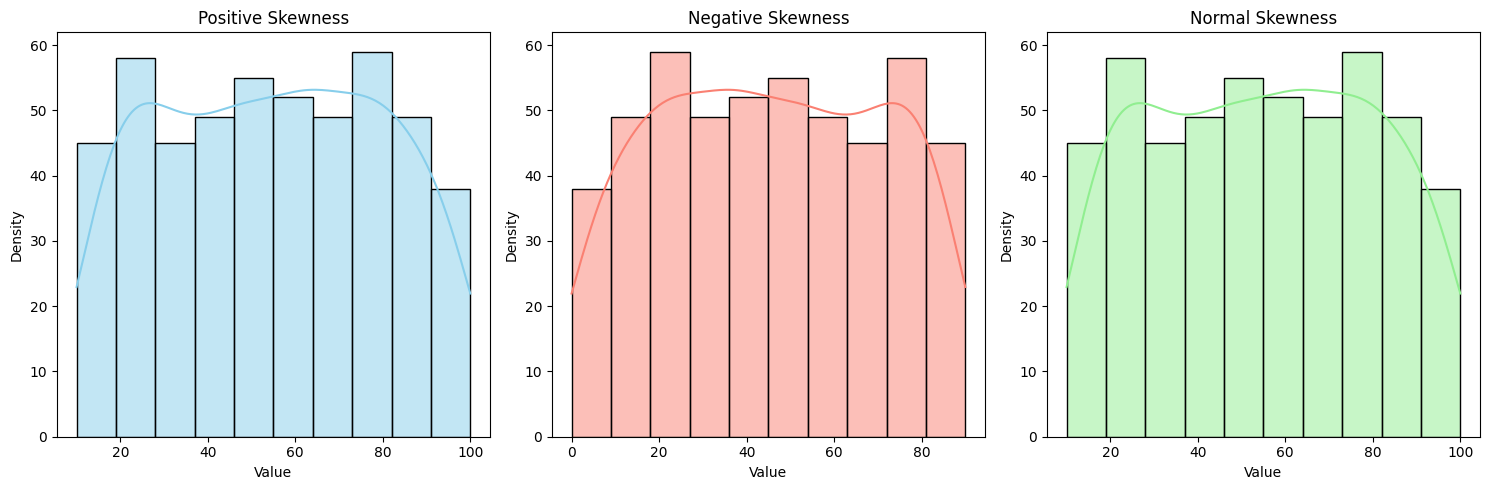

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Assuming df['price'] contains your data
data = df['Price']

# Calculate skewness
skewness = skew(data)

# Plotting with KDE curves
plt.figure(figsize=(15, 5))

# Positive Skewness
plt.subplot(1, 3, 1)
sns.histplot(data, kde=True, color='skyblue', edgecolor='black')
plt.title("Positive Skewness")
plt.xlabel("Value")
plt.ylabel("Density")

# Negative Skewness
plt.subplot(1, 3, 2)
sns.histplot(100 - data, kde=True, color='salmon', edgecolor='black')
plt.title("Negative Skewness")
plt.xlabel("Value")
plt.ylabel("Density")

# Normal Skewness
plt.subplot(1, 3, 3)
sns.histplot(np.random.permutation(data), kde=True, color='lightgreen', edgecolor='black')
plt.title("Normal Skewness")
plt.xlabel("Value")
plt.ylabel("Density")

# Printing Skewness values
print("\nSkewness Values:")
print("Positive Skewness:", skewness)
print("Negative Skewness:", -skewness)
print("Normal Skewness:", skew(np.random.permutation(data)))

plt.tight_layout()
plt.show()

In [13]:
df = pd.read_csv('/content/transaction_final.csv')
print("Missing values before cleaning:")
print(df.isnull().sum())

df_cleaned = df.dropna(how='any')

# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

Missing values before cleaning:
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64

Missing values after cleaning:
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64


In [14]:
df = pd.read_csv('/content/transaction_final.csv')
print("Missing values before cleaning:")
print(df.isnull().sum())
df_pairwise = df.dropna(axis=0, how='any')

# Check for missing values after pairwise dropping
print("Missing values after pairwise dropping:")
print(df_pairwise.isnull().sum())

Missing values before cleaning:
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64
Missing values after pairwise dropping:
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64


In [15]:
# Dropping variables (dropping columns with missing values)
df_dropped = df.dropna(axis=1)

print("After Dropping Variables:")
print(df_dropped)

After Dropping Variables:
     CustomerID ProductID  Quantity      Price   TransactionDate  \
0        109318         C         7  80.079844  12/26/2023 12:32   
1        993229         C         4  75.195229     8/5/2023 0:00   
2        579675         A         8  31.528816   3/11/2024 18:51   
3        799826         D         5  98.880218  10/27/2023 22:00   
4        121413         A         7  93.188512  12/22/2023 11:38   
..          ...       ...       ...        ...               ...   
494      953640         B         1  71.915313   7/22/2023 19:10   
495      246637         A         7  25.669699   12/12/2023 5:25   
496      587590         D         9  88.377706   8/25/2023 23:40   
497      367759         C         4  87.280642    9/8/2023 12:11   
498      422178         D         4  29.464526    1/20/2024 7:24   

    PaymentMethod                                      StoreLocation  \
0            Cash            176 Andrew Cliffs\nBaileyfort, HI 93354   
1            

In [16]:
# Imputation: Mean
data = df['TotalAmount']
df_mean_imputed = df.fillna(data.mean())

print("After Mean Imputation:")
print(df_mean_imputed)

# Imputation: Median
df_median_imputed = df.fillna(data.median())

print("After Median Imputation:")
print(df_median_imputed)

# Imputation: Mode
df_mode_imputed = df.apply(lambda x: x.fillna(x.mode()[0]))

print("After Mode Imputation:")
print(df_mode_imputed)


After Mean Imputation:
     CustomerID ProductID  Quantity      Price   TransactionDate  \
0        109318         C         7  80.079844  12/26/2023 12:32   
1        993229         C         4  75.195229     8/5/2023 0:00   
2        579675         A         8  31.528816   3/11/2024 18:51   
3        799826         D         5  98.880218  10/27/2023 22:00   
4        121413         A         7  93.188512  12/22/2023 11:38   
..          ...       ...       ...        ...               ...   
494      953640         B         1  71.915313   7/22/2023 19:10   
495      246637         A         7  25.669699   12/12/2023 5:25   
496      587590         D         9  88.377706   8/25/2023 23:40   
497      367759         C         4  87.280642    9/8/2023 12:11   
498      422178         D         4  29.464526    1/20/2024 7:24   

    PaymentMethod                                      StoreLocation  \
0            Cash            176 Andrew Cliffs\nBaileyfort, HI 93354   
1            Cas

In [17]:

df = pd.read_csv('/content/transaction_final.csv')
df = pd.DataFrame(data)
# Introducing duplicates
df = pd.concat([df, df.sample(n=3, replace=True)])

# Introducing outliers
df.loc[10, 'price'] = 150
df.loc[11, 'TotalAmount'] = 140
df.loc[12, 'CustomerID'] = 0

# Displaying the dataset with duplicates and outliers
print("Dataset with Duplicates and Outliers:")
print(df)


Dataset with Duplicates and Outliers:
     TotalAmount  price  CustomerID
0     455.862764    NaN         NaN
1     258.306546    NaN         NaN
2     212.015651    NaN         NaN
3     461.343769    NaN         NaN
4     626.030484    NaN         NaN
..           ...    ...         ...
497   342.148614    NaN         NaN
498   101.720635    NaN         NaN
65    386.954194    NaN         NaN
128    86.867128    NaN         NaN
297    73.370884    NaN         NaN

[502 rows x 3 columns]


In [18]:
import pandas as pd

# Read the original dataset
df1 = pd.read_csv('/content/transaction_final.csv')

# Assuming `data` contains the additional rows
additional_df = pd.DataFrame(data)

# Concatenating additional rows to the original dataset
df = pd.concat([df1, additional_df], ignore_index=True)

# Renaming columns
df = df.rename(columns={'TotalAmount': 'totalamt'})

# Define the column(s) for which to detect outliers
columns_to_check = ['CustomerID', 'totalamt', 'DiscountApplied(%)']

# Calculate the quartiles and IQR for each specified column
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier range for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers and display them
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)

# Print the original dataset only once
print(df1)


Outliers in CustomerID:
Empty DataFrame
Columns: [CustomerID, ProductID, Quantity, Price, TransactionDate, PaymentMethod, StoreLocation, ProductCategory, DiscountApplied(%), totalamt]
Index: []
Outliers in totalamt:
     CustomerID ProductID  Quantity      Price  TransactionDate PaymentMethod  \
107    142499.0         B       9.0  88.778165    5/8/2023 0:23   Credit Card   
464    493138.0         D       9.0  99.999284  9/27/2023 23:40   Credit Card   
606         NaN       NaN       NaN        NaN              NaN           NaN   
963         NaN       NaN       NaN        NaN              NaN           NaN   

                               StoreLocation ProductCategory  \
107    409 Hampton Hill\nLake Gail, MA 03704     Electronics   
464  766 Bryant Lock\nNorth Ashley, MP 73093        Clothing   
606                                      NaN             NaN   
963                                      NaN             NaN   

     DiscountApplied(%)    totalamt  
107            0.88

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [22]:
df = pd.read_csv('/content/transaction_final.csv')

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('/content/transaction_final.csv')
df=pd.DataFrame(data)
df
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          499 non-null    int64  
 1   ProductID           499 non-null    object 
 2   Quantity            499 non-null    int64  
 3   Price               499 non-null    float64
 4   TransactionDate     499 non-null    object 
 5   PaymentMethod       499 non-null    object 
 6   StoreLocation       499 non-null    object 
 7   ProductCategory     499 non-null    object 
 8   DiscountApplied(%)  499 non-null    float64
 9   TotalAmount         499 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 39.1+ KB


,0
CustomerID,0
ProductID,0
Quantity,0
Price,0
TransactionDate,0
PaymentMethod,0
StoreLocation,0
ProductCategory,0
DiscountApplied(%),0
TotalAmount,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [26]:
X = df.drop(columns=["Price"]) # Features
y = df["Price"] # Target variable

# Split the dataset into training and testing sets
# Adjust the test_size parameter as needed (e.g., test_size=0.2 for 80% training and 20% testing)
# You can also specify a random_state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (399, 9)
Shape of X_test: (100, 9)
Shape of y_train: (399,)
Shape of y_test: (100,)


In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is your DataFrame containing the dataset, import it here
# For example:
# data = pd.read_csv('your_data.csv')

# Convert non-numeric data to numeric
# You can use label encoding or one-hot encoding depending on the nature of your data
# For simplicity, let's drop non-numeric columns for now
data_numeric = data.select_dtypes(include=['number'])

# Define features (X) and target variable (y)
X = data_numeric.drop(columns=["Price"])  # Features
y = data_numeric["Price"] > 3  # Target variable: 1 if avg review > 3 (good instructor)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        True       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[100]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
X= data.drop(columns=["Quantity"]) # Features
y = (data["Quantity"] > 3).astype(int) # Target variable: 1 if avg review > 3 (goodinstructor), 0 otherwise# Initialize the model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = linear_regressor.predict(X_train)
y_pred_test = linear_regressor.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")

Train Mean Squared Error: 0.0
Test Mean Squared Error: 0.0
Train R-squared: 1.0
Test R-squared: 1.0


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df1 = pd.DataFrame(df)

# Define the feature set and target variable
X = df1[['TotalAmount']]
y = df1['PaymentMethod']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get user input for new prediction
try:
    customer_id = int(input("Enter CustomerID: "))
    product_id = int(input("Enter ProductID: "))
    quantity = int(input("Enter Quantity: "))
    price = float(input("Enter Price: "))
    transaction_date = input("Enter TransactionDate (YYYY-MM-DD): ")
    total_amount = float(input("Enter TotalAmount: "))

    new_data = pd.DataFrame({
        'CustomerID': [customer_id],
        'ProductID': [product_id],
        'Quantity': [quantity],
        'Price': [price],
        'TransactionDate': [transaction_date],
        'TotalAmount': [total_amount]
    })

    prediction = clf.predict(new_data[['TotalAmount']])
    print(f"The suitable payment method for the total amount of {total_amount} is: {prediction[0]}")
except ValueError as e:
    print(f"Invalid input: {e}. Please enter the correct values.")


Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support

        Cash       0.17      0.15      0.16        20
 Credit Card       0.25      0.16      0.20        25
  Debit Card       0.33      0.52      0.40        27
      PayPal       0.52      0.43      0.47        28

    accuracy                           0.33       100
   macro avg       0.32      0.31      0.31       100
weighted avg       0.33      0.33      0.32       100

Enter CustomerID: 1234567
Enter ProductID: 67
Enter Quantity: 8
Enter Price: 80
Enter TransactionDate (YYYY-MM-DD): 2004
Enter TotalAmount: 2000
The suitable payment method for the total amount of 2000.0 is: Credit Card
